In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [2]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [3]:
def visualize_data(data):
    points = data
    plt.scatter(points[:, 0], points[:, 1])
    plt.show()

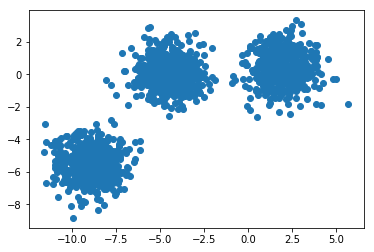

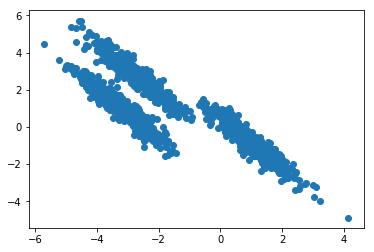

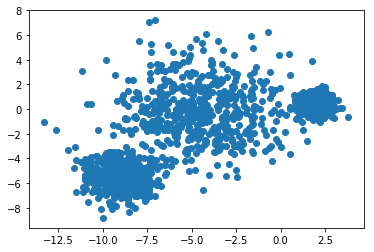

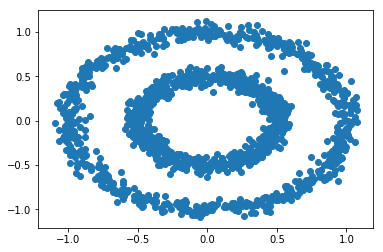

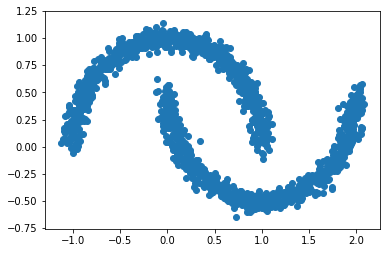

In [4]:
visualize_data(X)
visualize_data(X_aniso)
visualize_data(varied[0])
visualize_data(noisy_circles[0])
visualize_data(noisy_moons[0])

In [5]:
from sklearn import metrics

### sckit-optimize library

In [27]:
!pip install scikit-optimize

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
dataset = varied

In [54]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

In [66]:
space  = [Real(0.0001, 1.0, name='eps')]

In [67]:
@use_named_args(space)
def f(**params):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    algorithm = cluster.DBSCAN(**params)
    algorithm.fit(X)

    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    if len(set(y_pred)) == 1:
        return 0
    else:
        return -1 * metrics.silhouette_score(X, y_pred, metric='euclidean')

In [68]:
res = gp_minimize(f,                  # the function to minimize
                  space,      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=30,         # the number of evaluations of f 
                  n_random_starts=5,  # the number of random initialization points
                  random_state=14)   # the random seed

In [69]:
res.x

[0.16508235891715956]

In [70]:
res.fun

-0.5078811885803932

In [71]:
params = {
    'eps': res.x[0]
}

In [16]:
def f_plot(**params):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    algorithm = cluster.DBSCAN(**params)
    algorithm.fit(X)

    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
    
    plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
    plt.show()

    if len(set(y_pred)) == 1:
        return 0
    else:
        return -1 * metrics.silhouette_score(X, y_pred, metric='euclidean')

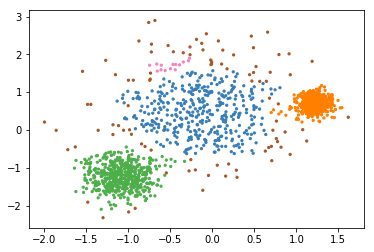

-0.5467297608530273

In [17]:
f_plot(**params)

In [18]:
from skopt.plots import plot_convergence

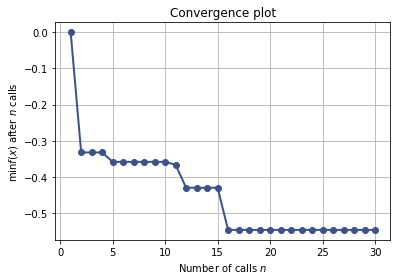

In [19]:
plot_convergence(res)

### SMAC3 library

In [1]:
!pip install smac

    100% |████████████████████████████████| 143kB 1.9MB/s ta 0:00:01
    100% |████████████████████████████████| 2.0MB 4.5MB/s ta 0:00:011
    100% |████████████████████████████████| 440kB 4.2MB/s eta 0:00:01
    100% |████████████████████████████████| 890kB 5.9MB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 1.9MB/s ta 0:00:011
    100% |████████████████████████████████| 3.3MB 1.7MB/s ta 0:00:011
    100% |████████████████████████████████| 6.4MB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 163kB 9.3MB/s eta 0:00:01
    100% |████████████████████████████████| 8.0MB 2.4MB/s ta 0:00:011
    100% |████████████████████████████████| 1.8MB 4.4MB/s eta 0:00:01
    100% |████████████████████████████████| 552kB 2.0MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 7.0MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 6.4MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 1.6MB/s eta 0:00:01
    100% |█████████████

    100% |████████████████████████████████| 92kB 4.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 153kB 7.3MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 153kB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 6.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for smac ... done
  Stored in directory: /home/wywongbd/.cache/pip/wheels/74/c6/79/7ccdfa9d78623033fd02a8c313a9558d1307f40d3ad1f5048c
  Running setup.py bdist_wheel for psutil ... done
  Stored in directory: /home/wywongbd/.cache/pip/wheels/90/7e/74/bb640d77775e6b6a78bcc3120f9fea4d2a28b2706de1cff37d
  Running setup.py bdist_wheel for pynisher ... done
  Stored in directory: /home/wywongbd/.cache/pip/wheels/af/2a/c4/ec3abc8a2f786ef9786ea8fe6ff629a4e54812a3f98cc41

  Running setup.py bdist_wheel for snowballstemmer ... done
  Stored in directory: /home/wywongbd/.cache/pip/wheels/93/db/97/496f1d6bbcad1fecbc58fe45363540414be519312eded82bab
Successfully built smac psutil pynisher ConfigSpace pyrfr pyDOE sobol-seq emcee snowballstemmer
Failed to build george
  Running setup.py install for george ... done
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [46]:
# Import ConfigSpace and different types of parameters
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, UniformFloatHyperparameter, UniformIntegerHyperparameter
from ConfigSpace.conditions import InCondition

# Import SMAC-utilities
from smac.tae.execute_func import ExecuteTAFuncDict
from smac.scenario.scenario import Scenario
from smac.facade.smac_facade import SMAC

In [47]:
cs = ConfigurationSpace()

In [48]:
eps = UniformFloatHyperparameter("eps", 0.0001, 1.0, default_value=0.5)

In [49]:
cs.add_hyperparameter(eps)

eps, Type: UniformFloat, Range: [0.0001, 1.0], Default: 0.5

In [75]:
def f(cfg):
    cfg = {k : cfg[k] for k in cfg if cfg[k]}
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    algorithm = cluster.DBSCAN(cfg['eps'])
    algorithm.fit(X)

    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    if len(set(y_pred)) == 1:
        return 0
    else:
        return -1 * metrics.silhouette_score(X, y_pred, metric='euclidean')

In [76]:
scenario = Scenario({
    "run_obj": "quality",
    "runcount-limit": 20,
    "cs": cs,
    "deterministic": "true"
})

In [77]:
smac_obj = SMAC(scenario=scenario, rng=np.random.RandomState(30), tae_runner=f)
incumbent = smac_obj.optimize()
print(incumbent, f(incumbent))

Configuration:
  eps, Value: 0.1827296627464989
 -0.5323906616177947


In [82]:
history = smac_obj.get_runhistory().data

In [91]:
for key in history.keys():
    print(history[key])

RunValue(cost=-0.39388387816783704, time=0.13975167274475098, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=0, time=0.07059812545776367, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=0, time=0.06873035430908203, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=0, time=0.07352900505065918, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=-0.30162062540704493, time=0.13926219940185547, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=-0.5323906616177947, time=0.12537860870361328, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=-0.33239864410551745, time=0.1350846290588379, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=0, time=0.07433915138244629, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=-0.13352870917962958, time=0.11891961097717285, status=<StatusType.SUCCESS: 1>, additional_info={})
RunValue(cost=0.21092287420078426, time=0.1172251701